# Linear Regression
In linear regression, the relationship is estimated between two variables i.e., one
response variable and one predictor variable. Linear regression produces a straight line on the
graph. Mathematically,  
𝑦 = 𝑎𝑥 + 𝑏 + 𝑒,  
where,  
**x** indicates predictor or independent variable  
**y** indicates response or dependent variable  
**a** and **b** are coefficients  
**e** is the error term (also known as the residual errors).  

In R, lm() function creates the relationship model between the predictor and the response variable. The basic Syntax is `lm(formula, data) where,`
1. formula is a symbol presenting the relation between x and y.
2. data is the vector on which the formula will be applied.

### Creating Linear Regression Model
We can use `lm(formula=y~x)` or we store it as a model then use `print()` function to get the coeffficients.

In [1]:
# Height vector
x=c(153, 169, 140, 186, 128,136, 178, 163, 152, 133)
#Weight vector
y=c(64, 81, 58, 91, 47, 57,75, 72, 62, 49)
#Create a linear regression model
model=lm(y~x) #storing it into variable

In [2]:
#Getting the coefficients 
print(model)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -39.7137       0.6847  



### Making predictions
 One can use `predict(model,DataFrame)` function to make prediction in Linear Regression.

In [3]:
#Example
# Find the weight of a person
# With height 182
df=data.frame(x = 182) #creating dataframe for prediction by giving an input value
res=predict(model, df) #using previously created model
cat("Predicted value of a person with height = 182")
print(res)

Predicted value of a person with height = 182      1 
84.9098 


In [4]:
#Predicting weights for multiple people
x=c(123,132,190,167,132,123,182)
df=data.frame(x)#creating dataframe for prediction from the input vector
predict(model,df) #predicting weights based on the coefficient obtained from the model

1        2        3        4        5        6        7 
44.50987 50.67257 90.38776 74.63863 50.67257 44.50987 84.90980

### Graphical representation of Linear Regression model
We can use `plot()` and `abline()` function to visualize the linear regression model.

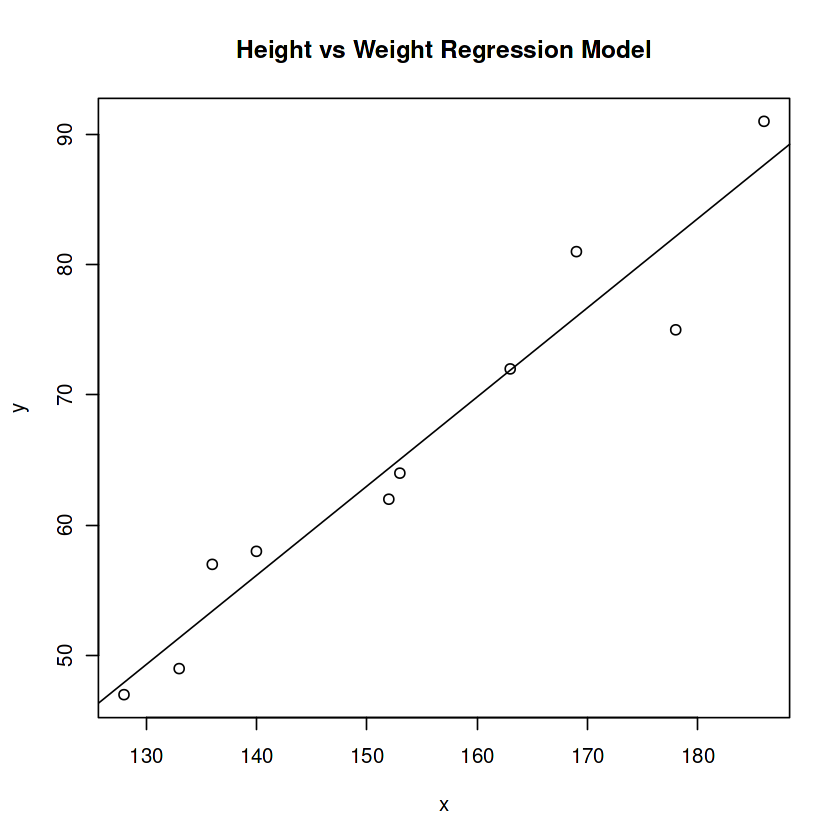

In [5]:
#Example
#Height vector
x=c(153, 169, 140, 186, 128,136, 178, 163, 152, 133)
#Weight vector
y=c(64, 81, 58, 91, 47, 57,75, 72, 62, 49)
plot(x, y, main = "Height vs Weight Regression Model") #plots the line plot
abline(lm(y~x)) #adds linear regression line

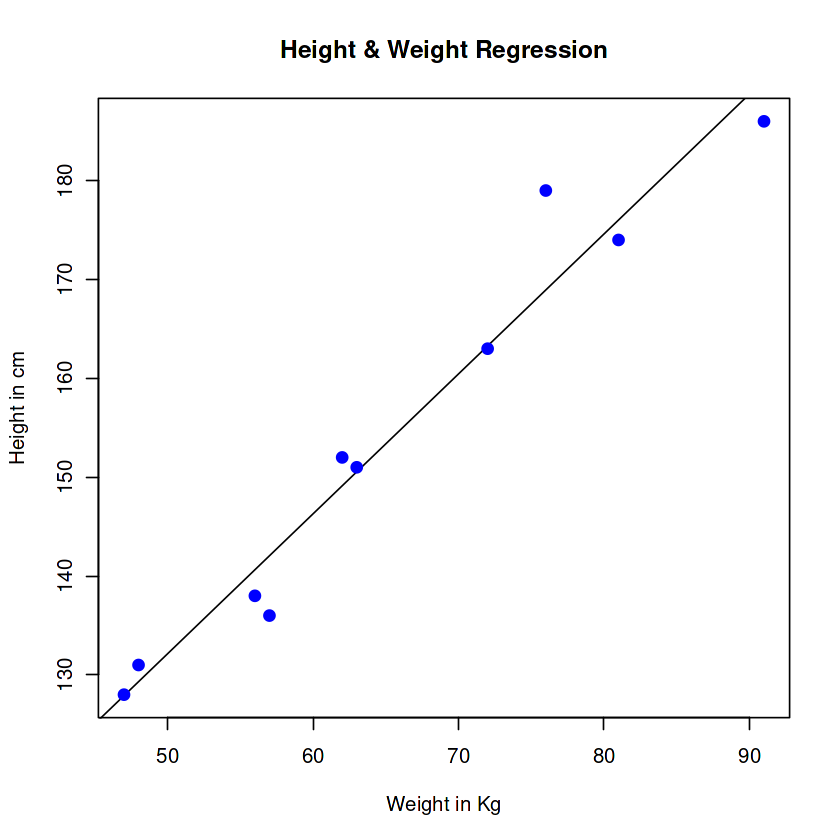

In [6]:
x=c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y=c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)
plot(y,x,col = "blue",
     main = "Height & Weight Regression",
     abline(lm(x~y)),cex=1.3,pch=16,
     xlab = "Weight in Kg",ylab = "Height in cm")

**Before going to next set of question load package datarium as follows:**

In [7]:
install.packages('datarium')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### `ggplot()` function in Linear Regression
ggplot2 is a plotting package that makes it simple to create complex plots from data in a
data frame. The basic syntax is:  
`ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) + <GEOM_FUNCTION>()`

In [8]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Now we will see an example of linear regression using dataset from datarium and using ggplot2 for attractive plots

In [9]:
data("marketing", package = "datarium")
library("ggplot2")
head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


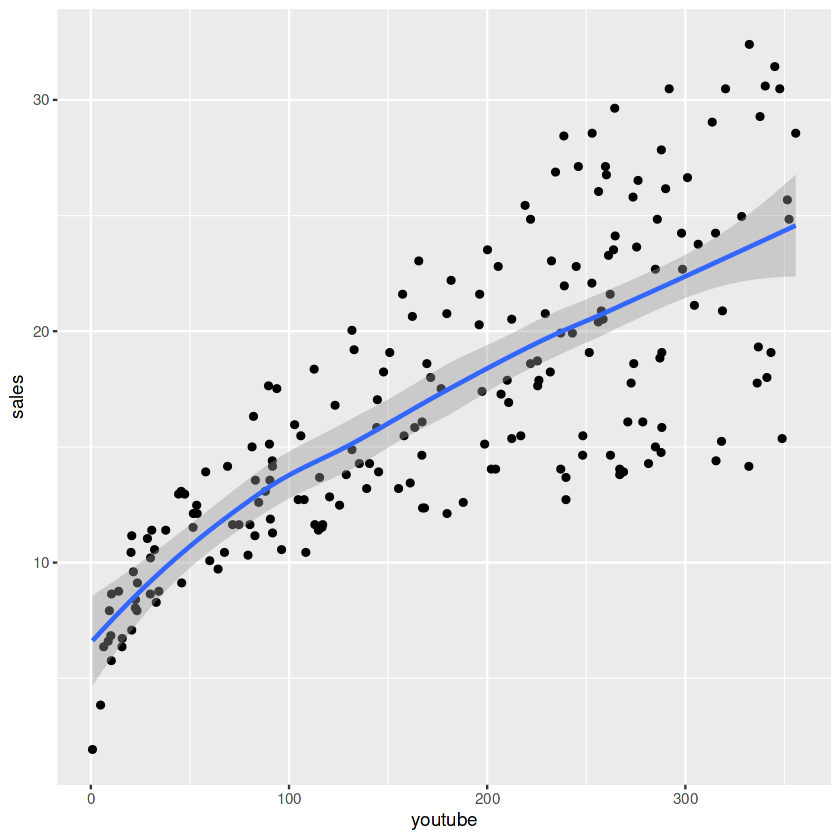

In [10]:
ggplot(marketing,aes(x=youtube,y=sales)) + geom_point() + stat_smooth()
# This will create a scatter plot displaying the sales units versus youtube advertising budget and 
# Add a smoothed line as shown below:

`geom_point()` For scatter plot and `stat_smooth()` is for the curve.



The graph above suggests a linearly increasing relationship between the sales and
the youtube variables. This is a good thing, because, one important assumption of the linear
regression is that the relationship between the outcome and predictor variables is linear and
additive.

### Regression line in scatter plot
To add the regression line onto the scatter plot, you can use the function `stat_smooth()`. By default, the fitted line is presented with confidence interval around it. The confidence bands reflect the uncertainty about the line. If you don’t want to display it, specify the option `se = FALSE` in the function `stat_smooth()`.

`geom_smooth()` using formula = 'y ~ x'


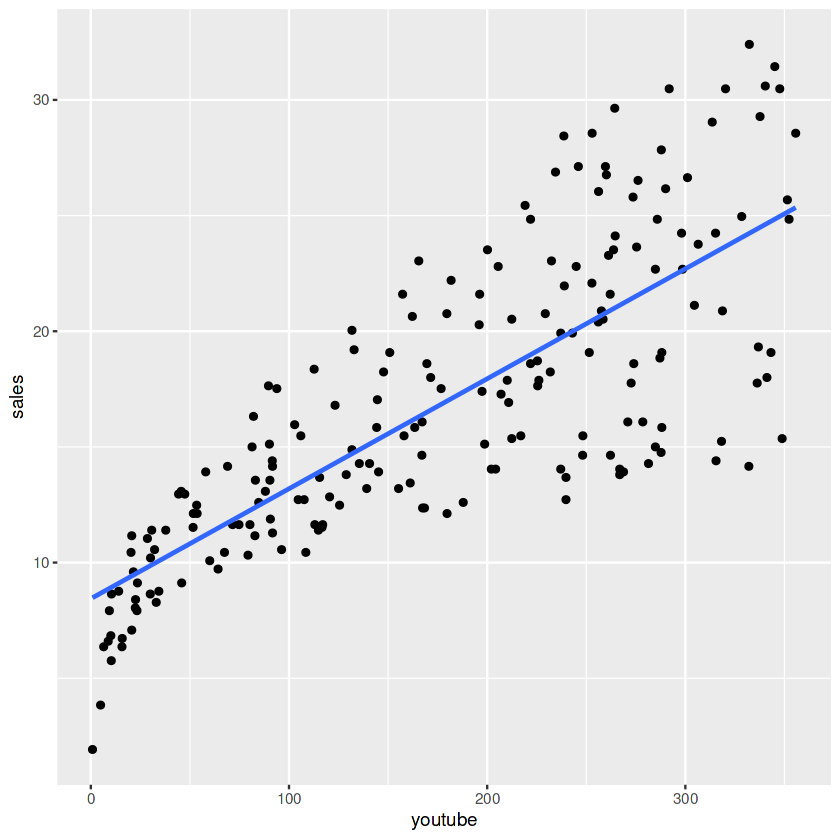

In [11]:
data("marketing", package = "datarium")
model=lm(sales ~ youtube, data = marketing)
ggplot(marketing, aes(youtube, sales))+geom_point()+stat_smooth(method = lm, se = FALSE)
# Gives the regression line without the confidence interval

### Accuracy Measures
The overall quality of the linear regression fit can be assessed using the following three
quantities, displayed in the model summary:  
1. The Residual Standard Error (RSE): Standard deviation is the square root of variance. Standard Error is very similar. The only difference is that instead of dividing by n-1, you subtract n minus 1 + No of variables involved. We can use sqrt(SSE/(n-(1+k))) for residual error.
2. The R-squared (R2): R-Squared subtracts the residual error from the variance in Y
3. F-statistic: The F-Statistic is a “global” test that checks if at least one of your coefficients are nonzero. The reason for this test is based on the fact that if you run multiple hypothesis tests (namely, on your coefficients), you’re likely to include a variable that isn’t actually significant.  
Where,
* RSE: Closer to zero the better
* R-Squared: Higher the better
* F-statistic: Higher the better

In above example we can build summary using,`summary()` function.

In [12]:
model=lm(sales ~ youtube, data = marketing)
summary(model)


Call:
lm(formula = sales ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In our example, both the p-values for the intercept and the predictor variable are highly
significant, so we can reject the null hypothesis and accept the alternative hypothesis, which
means that there is a significant association between the predictor and the outcome variables.

**NOTE: In above summary, Residual is the Difference between what the model predicted
and the actual value of y.**

Recall:
The statistical hypotheses are as follow:
* Null hypothesis (H0): the coefficients are equal to zero (i.e., no relationship between x and y)
* Alternative Hypothesis (Ha): the coefficients are not equal to zero (i.e., there is some relationship between x and y)  
And
* For a given predictor, the t-statistic (and its associated p-value) tests whether or not there is a statistically significant relationship between a given predictor and the outcome variable, that is whether or not the beta coefficient of the predictor is significantly different from zero.

### Signgicance of Code
In the model summary one can observe that just below the coefficients there is line of significance of code,  
`0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1`  
In here the significance is indicated by number of `*` (the more number of * indicate more significant attribute). These `*` are given right after the attributes p-value.

###  RSE
The RSE (also known as the model sigma) is the residual variation, representing the
average variation of the observations points around the fitted regression line. This is the standard
deviation of residual errors
In above example, RSE = 3.91, meaning that the observed sales values deviate from the true
regression line by approximately 3.9 units in average.
we can calculate the percentage error. In our data set, the mean value of sales is 16.827, and so
the percentage error is 3.9/16.827 = 23%.

In [13]:
#RSE
sigma(model)

[1] 3.910388

In [14]:
#Percentage Error
sigma(model)*100/mean(marketing$sales)

[1] 23.23877

The End